In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [209]:
df = pd.read_csv("train.csv")
df.drop(columns=["Id"], inplace=True)
df.head(10)

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.64 liters per 100 km,6.14 L/100 km,37.59 mpg Imp.,306.0
1,CHEVO,PICKUP TRUCK - STANDARD,5.3,NaN,A6,E,27.27 liters per 100 km,30.76 liters per 100 km,28.84 L/100 km,283.0
2,BMV,SUBCOMPACT,4.4,NaN,M6,Z,0.17 L/10km,2.03 liters per 100 km,zero,329.0
3,KIO,SUV - SMALL,NaN,4.0,AS6,X,6.52 km per L,1.59 L/10km,NaN,270.0
4,BARUSU,MINICOMPACT,3.0,6.0,unspecified,Z,20.15 L/100km,0.60 L/10km,1.38 L/10km,193.0
5,LECUS,COMPACT,unspecified,4.0,not-recorded,Z,5.57 MPG (AS),38.28 mpg Imp.,8.86 MPG (AS),217.0
6,GONDA,FULL-SIZE,1.8,4.0,AV7,X,7.52 L/100km,14.76 mpg Imp.,12.75 L/100 km,174.0
7,LAND CRAWLER,SUV - SMALL,2.0,4.0,AS8,Z,28.55 MPG (AS),2.06 liters per 100 km,18.33 km/L,246.0
8,CHEVO,SUV - STANDARD,3.6,NaN,A9,X,9.16 mpg Imp.,2.08 L/10km,26.31 L/100km,278.0
9,FOLKSWA,COMPACT,2.0,4.0,AS6,X,43.84 km per L,18.13 L/100 km,-9999,202.0


In [210]:
df.dropna(inplace=True)

In [211]:
for column in df.columns:
  print(df[column].unique())
  print(" ")

['FOLD' 'BARUSU' 'LECUS' 'GONDA' 'LAND CRAWLER' 'FOLKSWA' 'TOYOTI' 'BMV'
 'JIPU' 'CHEVO' 'ASURA' 'KIO' 'FIAR' 'TOLVO' 'DOGE' 'MATSUDA' 'NIRRAN'
 'MITSU' 'CADILUXE' 'LAMBOGI' 'RYUNDAI']
 
['PICKUP TRUCK - STANDARD' 'MINICOMPACT' 'COMPACT' 'FULL-SIZE'
 'SUV - SMALL' 'SUBCOMPACT' 'MINIVAN' 'SUV - STANDARD'
 'STATION WAGON - SMALL' 'missing' 'TWO-SEATER' 'MID-SIZE'
 'PICKUP TRUCK - SMALL' 'VAN - PASSENGER' 'not-recorded' 'na'
 'SPECIAL PURPOSE VEHICLE' 'unspecified' 'unknown'
 'STATION WAGON - MID-SIZE' 'VAN - CARGO' 'not-available' '-1'
 'unestablished']
 
['3.5' '3.0' 'unspecified' '1.8' '2.0' '2.5' 'missing' '2.3' '5.3' '1.4'
 '2.4' '1.6' '4.4' '1.3' '6.2' '3.6' '4.8' '2.7' '6.0' '6.5' '5.7' '3.7'
 '1.2' '3.3' '1.5' '5.0' '3.2' '4.0' '5.2' 'not-recorded' 'not-available'
 '-1' 'unknown' 'na' 'unestablished' '4.3' '6.4' '4.6' '6.6' '3.8' '5.4'
 '1.0' '5.6' '5.8' '3.4' '8.4' '2.8' '6.8' '2.2' '4.2']
 
['6.0' '4.0' '8.0' '12.0' 'unspecified' 'not-recorded' '3.0' '-1'
 'missing' '5.0' 'unkno

In [212]:
def is_float(num):
    try:
        float(num)
        return True
    except:
        return False
list_temp=[]
for record in df["Fuel Consumption City"]:
    try:
        list_word=record.split(" ", 1)
        list_temp.append(list_word[1])
    except:
        continue
for rec in set(list_temp):
    if(is_float(rec)):
        continue
    else:
        print(rec)

L/100km
MPG (AS)
mpg Imp.
L/100 km
liters per 100 km
km per L
L/10km
km/L


In [213]:
def convert_to_km_l(value, unit):
    if unit=="mpg Imp.":
        return(float(value)/0.354006)
    elif unit=="liters per 100 km" or unit=="L/100 km" or unit=="L/100km":
        return(100/float(value))
    elif unit=="km/L" or unit=="km per L":
        return(float(value))
    elif unit=="L/10km":
        return(10/float(value))
    elif unit=="MPG (AS)":
        return(float(value)/0.4251434788508811)

In [214]:
list_temp=[]
for record in df["Fuel Consumption City"]:
    try:
        list_word=record.split(" ", 1)
        list_temp.append(convert_to_km_l(list_word[0], list_word[1]))
    except:
        list_temp.append(0)
df["Fuel Consumption City"] = list_temp

list_temp.clear()
for record in df["Fuel Consumption Hwy"]:
    try:
        list_word=record.split(" ", 1)
        list_temp.append(convert_to_km_l(list_word[0], list_word[1]))
    except:
        list_temp.append(0)
df["Fuel Consumption Hwy"] = list_temp

list_temp.clear()
for record in df["Fuel Consumption Comb"]:
    try:
        list_word=record.split(" ", 1)
        list_temp.append(convert_to_km_l(list_word[0], list_word[1]))
    except:
        list_temp.append(0)
df["Fuel Consumption Comb"] = list_temp
list_temp.clear()

for rec in list_temp:
    print(rec)

In [215]:
df.head(10)

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,11.574074,16.286645,106.184641,306.0
4,BARUSU,MINICOMPACT,3.0,6.0,unspecified,Z,4.962779,16.666667,7.246377,193.0
5,LECUS,COMPACT,unspecified,4.0,not-recorded,Z,13.101459,108.133760,20.840023,217.0
6,GONDA,FULL-SIZE,1.8,4.0,AV7,X,13.297872,41.694209,7.843137,174.0
7,LAND CRAWLER,SUV - SMALL,2.0,4.0,AS8,Z,67.153800,48.543689,18.330000,246.0
9,FOLKSWA,COMPACT,2.0,4.0,AS6,X,43.840000,5.515720,0.000000,202.0
10,TOYOTI,SUV - SMALL,2.5,4.0,AS6,X,3.606203,44.052863,0.000000,216.0
11,BMV,SUBCOMPACT,3.0,6.0,M6,Z,5.260389,93.416496,6.990000,236.0
12,TOYOTI,MINIVAN,2.0,4.0,AS6,X,45.454545,18.867925,27.940000,260.0
13,JIPU,SUV - SMALL,missing,6.0,unknown,X,11.037528,8.190008,9.540000,308.0


In [216]:
df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)"]].describe()


,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
count,9.760400e+04,97604.000000,97604.000000,97604.000000
mean,2.832551e+02,116.638764,29.102593,247.205374
std,5.605543e+04,2152.256639,62.854201,75.272565
min,0.000000e+00,0.000000,0.000000,96.000000
25%,5.560000e+00,7.430000,6.662225,200.000000
50%,1.119410e+01,15.450000,10.881393,231.000000
75%,3.597122e+01,49.716671,31.307078,285.000000
max,1.745748e+07,416023.711463,5495.556572,822.111635


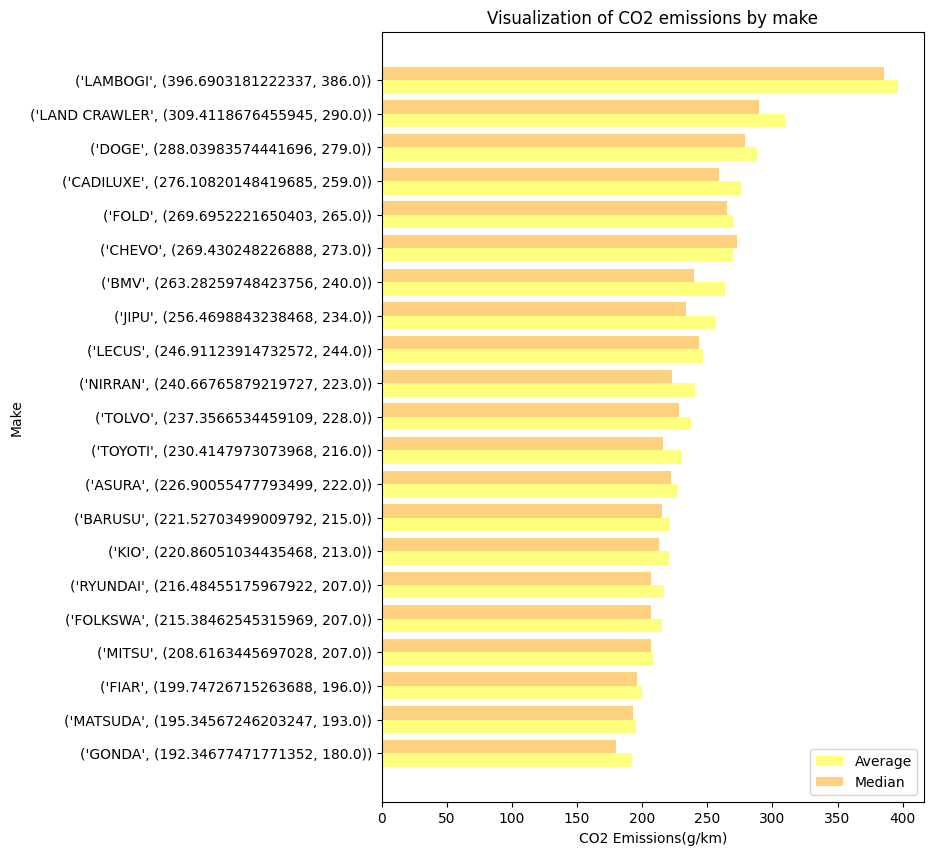

In [217]:
col_make=df["Make"].unique()
make_avg=[np.average(df["CO2 Emissions(g/km)"][df["Make"]==col]) for col in col_make]
make_median=[np.median(df["CO2 Emissions(g/km)"][df["Make"]==col]) for col in col_make]
dict_make=dict(zip(col_make, zip(make_avg, make_median)))
dict_make=sorted(dict_make.items(), key=lambda item: item[1])

fig, ax = plt.subplots(figsize=(7,10))
bar_width = 0.4

bar1 = ax.barh(np.arange(len(col_make)), [dict_make[:][i][1][0] for i in range(len(dict_make))], height=bar_width, color='yellow', alpha=0.5, label='Average')
bar2 = ax.barh(np.arange(len(col_make)) + bar_width, [dict_make[:][i][1][1] for i in range(len(dict_make))], height=bar_width, color='orange', alpha=0.5, label='Median')

ax.set_yticks(np.arange(len(col_make)) + bar_width / 2)
ax.set_yticklabels(dict_make)
ax.set_xlabel('CO2 Emissions(g/km)')
ax.set_ylabel('Make')
ax.set_title('Visualization of CO2 emissions by make')
ax.legend()

plt.show()


In [218]:
make_map={}
for i in range(len(dict_make)):
    make_map[dict_make[i][0]]=make_avg[i]
df["MakeAvg"]=df["Make"].map(make_map)
df["MakeAvg"] -= df["MakeAvg"].min()
df["MakeAvg"] /= df["MakeAvg"].max()


make_map={}
for i in range(len(dict_make)):
    make_map[dict_make[i][0]]=i+1
df["Make"]=df["Make"].map(make_map)

print(df["Make"].unique())

[17  8 13  1 20  5 10 15 14 16  9  7  3 11 19  2 12  4 18 21  6]


In [ ]:
col_vc=df["Vehicle Class"].unique()
vc_avg=[np.average(df["CO2 Emissions(g/km)"][df["Vehicle Class"]==col]) for col in col_vc]
vc_median=[np.median(df["CO2 Emissions(g/km)"][df["Vehicle Class"]==col]) for col in col_vc]

fig, ax = plt.subplots(figsize=(7,10))
bar_width = 0.4

bar1 = ax.barh(np.arange(len(col_vc)), vc_avg, height=bar_width, color='yellow', alpha=0.5, label='Average')
bar2 = ax.barh(np.arange(len(col_vc)) + bar_width, vc_median, height=bar_width, color='orange', alpha=0.5, label='Median')

ax.set_yticks(np.arange(len(col_vc)) + bar_width / 2)
ax.set_yticklabels(col_vc)
ax.set_xlabel('CO2 Emissions(g/km)')
ax.set_ylabel('Vehicle Class')
ax.set_title('Visualization of CO2 emissions by Vehicle Class')
ax.legend()

plt.show()


In [ ]:
col_trans=df["Transmission"].unique()
trans_avg=[np.average(df["CO2 Emissions(g/km)"][df["Transmission"]==col]) for col in col_trans]
trans_median=[np.median(df["CO2 Emissions(g/km)"][df["Transmission"]==col]) for col in col_trans]

fig, ax = plt.subplots(figsize=(7,10))
bar_width = 0.4

bar1 = ax.barh(np.arange(len(col_trans)), trans_avg, height=bar_width, color='yellow', alpha=0.5, label='Average')
bar2 = ax.barh(np.arange(len(col_trans)) + bar_width, trans_median, height=bar_width, color='orange', alpha=0.5, label='Median')

ax.set_yticks(np.arange(len(col_trans)) + bar_width / 2)
ax.set_yticklabels(col_trans)
ax.set_xlabel('CO2 Emissions(g/km)')
ax.set_ylabel('Transmission')
ax.set_title('Visualization of CO2 emissions by Transmission')
ax.legend()

plt.show()


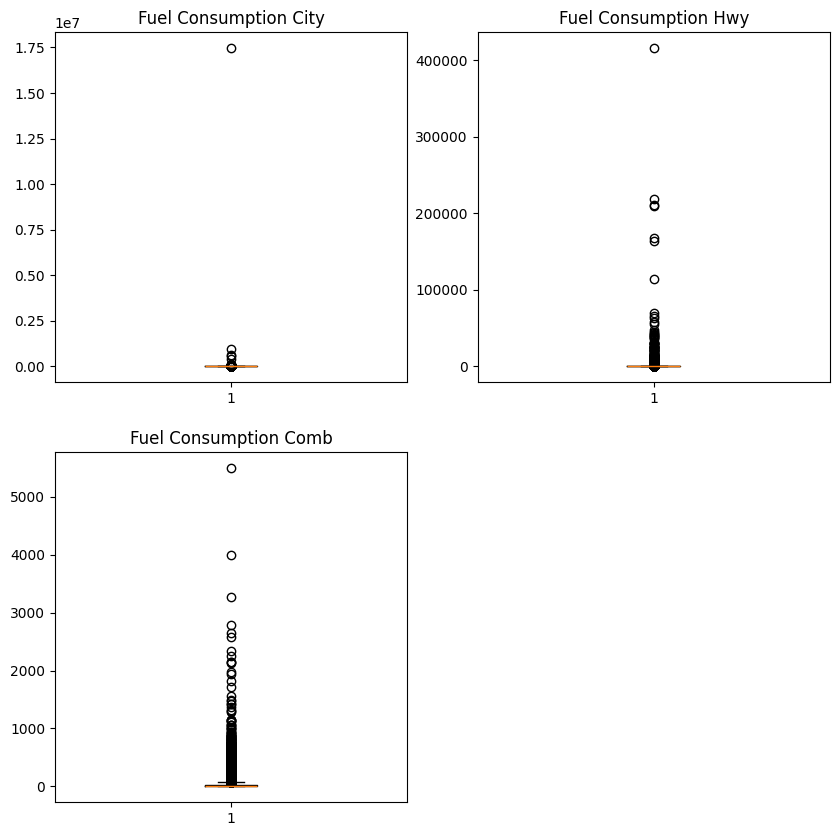

In [219]:
col_box=['Fuel Consumption City', 'Fuel Consumption Hwy','Fuel Consumption Comb']
plt.subplots(figsize=(10,10))
plt.delaxes()
i=1
for col in col_box:
    plt.subplot(2,2,i)
    plt.boxplot(df[col])
    plt.title(col)
    i+=1
plt.show()

In [ ]:
#MAPPING
# make_mapping = {
#   'FOLD': 0, 'CHEVO': 1, 
#   'BMV': 2, 'KIO': 3, 
#   'BARUSU': 4, 'LECUS': 5, 
#   'GONDA': 6, 'LAND CRAWLER': 7, 
#   'FOLKSWA': 8, 'TOYOTI': 9, 
#   'JIPU': 10, 'TOLVO': 11, 
#   'ASURA': 12, 'NIRRAN':13, 
#   'FIAR': 14, 'DOGE':15, 
#   'CADILUXE':16, 'MATSUDA':17, 
#   'MITSU':18, 'RYUNDAI':19, 
#   'LAMBOGI':20
# }

# ['PICKUP TRUCK - STANDARD' 'SUBCOMPACT' 'SUV - SMALL' 'MINICOMPACT'
#  'COMPACT' 'FULL-SIZE' 'SUV - STANDARD' 'MINIVAN' 'STATION WAGON - SMALL'
#  nan 'PICKUP TRUCK - SMALL' 'missing' 'TWO-SEATER'
#  'STATION WAGON - MID-SIZE' 'MID-SIZE' 'SPECIAL PURPOSE VEHICLE'
#  'VAN - PASSENGER' '-1' 'not-recorded' 'na' 'unspecified' 'unknown'
#  'unestablished' 'VAN - CARGO' 'not-available']

# df['Make'] = df['Make'].map(make_mapping)

In [220]:
#['X' 'E' 'Z' nan 'D' '-1' 'missing' 'unspecified' 'not-recorded' 'unknown', 'unestablished' 'na' 'not-available' 'N']
# len(df[df["Fuel Type"=="unknown"]])
df["Fuel Type"].value_counts()

Fuel Type
X                61210
Z                25792
E                 4628
D                 1983
not-recorded       866
unspecified        491
unknown            475
not-available      455
missing            454
unestablished      424
na                 408
-1                 401
N                   17
Name: count, dtype: int64

In [224]:
def CleanData(df, col):
        del_index=df[
        (df[col]=='unspecified') | 
        (df[col]=='missing') | 
        (df[col]=='not-recorded') | 
        (df[col]=='not-available') |
        (df[col]=='-1') |
        (df[col]=='unknown') |
        (df[col]=='na') |
        (df[col]=='unestablished')].index
        df.drop(del_index, inplace=True)
        df.reset_index()    
        return df
col_clean=['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type']
for col in col_clean:
        df=CleanData(df, col)
# del_index=df[(df["Fuel Consumption City"]==0) | (df["Fuel Consumption Hwy"]==0) | (df["Fuel Consumption Comb"]==0)].index
# df.drop(del_index, inplace=True)
# df.reset_index()
# del_index=df[(df["Cylinders"]=='unspecified') | (df["Engine Size(L)"]=='unspecified') |
#         (df["Cylinders"]=='missing') | (df["Engine Size(L)"]=='missing') |
#         (df["Cylinders"]=='not-recorded') | (df["Engine Size(L)"]=='not-recorded') |
#         (df["Cylinders"]=='not-available') | (df["Engine Size(L)"]=='not-available') |
#         (df["Cylinders"]=='-1') | (df["Engine Size(L)"]=='-1') |
#         (df["Cylinders"]=='unknown') | (df["Engine Size(L)"]=='unknown') |
#         (df["Cylinders"]=='na') | (df["Engine Size(L)"]=='na') |
#         (df["Cylinders"]=='unestablished') | (df["Engine Size(L)"]=='unestablished')].index
# df.drop(del_index, inplace=True)
# df.reset_index()
for column in df.columns:
  print(df[column].unique())
  print(" ")
df.drop_duplicates(inplace=True)
len(df)

[17  1 20  5 10 15 16  9 13  7  3 11 19  2 12 14 21 18  6  4  8]
 
['PICKUP TRUCK - STANDARD' 'FULL-SIZE' 'SUV - SMALL' 'COMPACT'
 'SUBCOMPACT' 'MINIVAN' 'SUV - STANDARD' 'STATION WAGON - SMALL'
 'TWO-SEATER' 'MID-SIZE' 'PICKUP TRUCK - SMALL' 'VAN - PASSENGER'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE' 'VAN - CARGO'
 'MINICOMPACT']
 
['3.5' '1.8' '2.0' '2.5' '3.0' '2.3' '5.3' '1.4' '2.4' '4.4' '1.3' '6.2'
 '3.6' '4.8' '2.7' '6.0' '6.5' '3.7' '5.7' '1.5' '5.0' '3.3' '5.2' '1.6'
 '4.0' '1.2' '4.3' '6.4' '6.6' '3.8' '5.4' '4.6' '3.2' '5.6' '5.8' '1.0'
 '8.4' '2.8' '3.4' '6.8' '2.2' '4.2']
 
['6.0' '4.0' '8.0' '12.0' '5.0' '10.0' '3.0']
 
['A6' 'AV7' 'AS8' 'AS6' 'M6' 'A8' 'A9' 'AV6' 'AS10' 'AM7' 'M5' 'AV' 'AS7'
 'AS5' 'A5' 'AS9' 'AM6' 'AV8' 'A4' 'AM9' 'AV10' 'AM8' 'M7' 'A7' 'A10']
 
['X' 'Z' 'D' 'E' 'N']
 
[ 11.57407407  13.29787234  67.15379965 ... 153.2659049  835.08278419
 117.17315526]
 
[1.62866450e+01 4.16942086e+01 4.85436893e+01 ... 5.00500000e+01
 5.19341480e+02 2.70925

75980

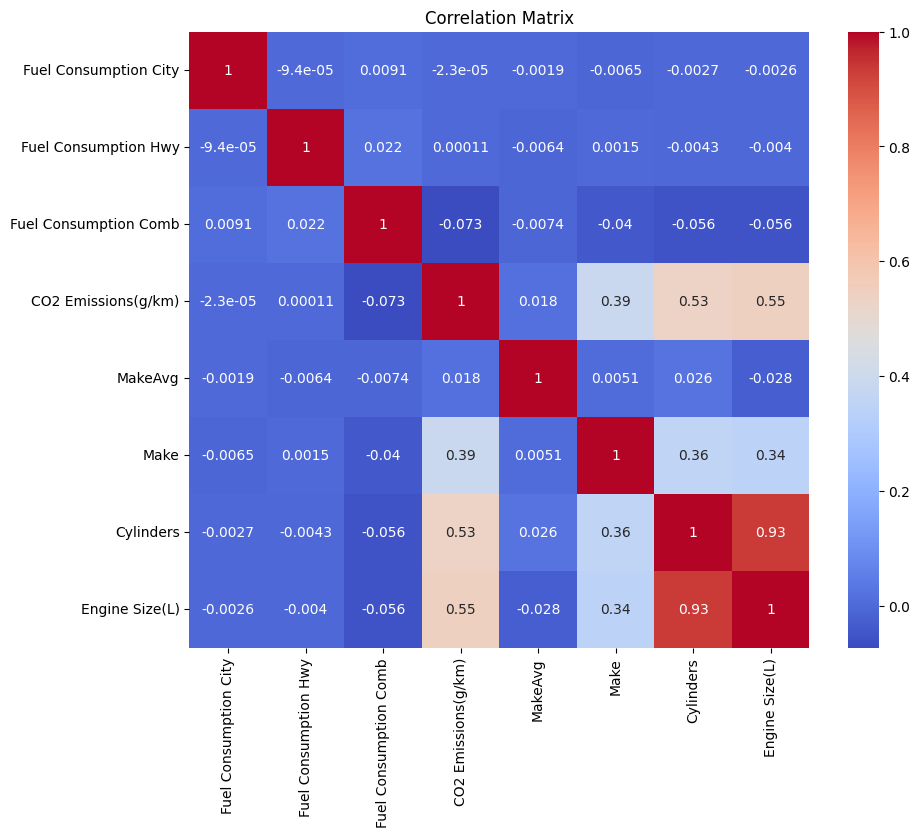

In [223]:
corr=df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)", "MakeAvg","Make",  "Cylinders", "Engine Size(L)"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df["Engine/Cylinders"]=df["Engine Size(L)"].astype(float)/df["Cylinders"].astype(float)
corr=df[["CO2 Emissions(g/km)", "Engine/Cylinders"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
plt.scatter(df["Fuel Consumption City"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption City")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()

plt.scatter(df["Fuel Consumption Hwy"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption Hwy")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()

plt.scatter(df["Fuel Consumption Comb"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()
# corr=df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)", "Make", "Cylinders", "Engine Size(L)"]].corr()

In [ ]:
max(df["Fuel Consumption City"])

In [ ]:
# del_index=df[(df["Fuel Consumption City"]>15000) | (df["Fuel Consumption Hwy"]>15000) | (df["Fuel Consumption Comb"]>800)].index
del_index=df[(df["Fuel Consumption City"]>15000000)].index
df.drop(del_index, inplace=True)
df.reset_index()
plt.scatter(df["Fuel Consumption City"], df["Fuel Consumption Hwy"])
plt.xlabel("Fuel Consumption City")
plt.ylabel("Fuel Consumption Hwy")  
plt.show()

In [ ]:
plt.scatter(df["Engine Size(L)"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption City")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()

plt.scatter(df["Cylinders"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption Hwy")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()
# corr=df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)", "Make", "Cylinders", "Engine Size(L)"]].corr()

In [ ]:
print(len(df))
df.to_csv("preprocessing.csv")